In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_json('olx.json')

In [3]:
dados.head()

,area,quartos,iptu,banheiros,vagas,valor
0,38m²,1,None,1,1,R$ 2.100
1,110m²,3,None,1,1,R$ 1.900
2,45m²,1,R$ 0,1,1,R$ 1.600
3,76m²,3,None,2,2,R$ 2.600
4,33m²,1,None,None,1,R$ 1.250


In [4]:
len(dados)

588

In [5]:
dados.describe()

,area,quartos,iptu,banheiros,vagas,valor
count,531,535,181,492,547,539
unique,134,5,68,6,6,135
top,0m²,3,R$ 0,2,1,R$ 2.500
freq,50,186,75,154,321,33


In [6]:
dados = dados.fillna(0)

In [7]:
dados.head()

,area,quartos,iptu,banheiros,vagas,valor
0,38m²,1,0,1,1,R$ 2.100
1,110m²,3,0,1,1,R$ 1.900
2,45m²,1,R$ 0,1,1,R$ 1.600
3,76m²,3,0,2,2,R$ 2.600
4,33m²,1,0,0,1,R$ 1.250


In [8]:
def limpar_valores(valor):
    valor = str(valor)
    return int(valor.replace("m²", "").replace("R$", "").replace(".", "").strip())

In [9]:
for coluna in ['area', 'iptu', 'valor']:
    dados[coluna] = dados[coluna].apply(limpar_valores)

In [10]:
dados.head()

,area,quartos,iptu,banheiros,vagas,valor
0,38,1,0,1,1,2100
1,110,3,0,1,1,1900
2,45,1,0,1,1,1600
3,76,3,0,2,2,2600
4,33,1,0,0,1,1250


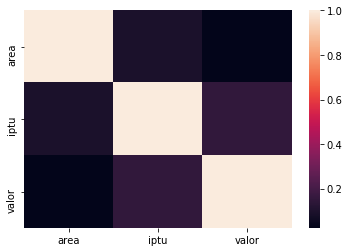

In [12]:
import seaborn as sns
sns.heatmap(dados.corr())

In [15]:
dados['quartos'] = dados['quartos'].apply(lambda i: int(i)) 

ValueError: invalid literal for int() with base 10: '5 ou mais'

In [16]:
dados['vagas'] = dados['vagas'].apply(lambda i: int(i)) 

ValueError: invalid literal for int() with base 10: '5 ou mais'

In [19]:
def cinco_ou_mais(valor):
    return int(''.join([l for l in str(valor) if l.isdigit()]))

In [20]:
dados['vagas'] = dados['vagas'].apply(cinco_ou_mais)
dados['quartos'] = dados['quartos'].apply(cinco_ou_mais)
dados['banheiros'] = dados['banheiros'].apply(cinco_ou_mais)

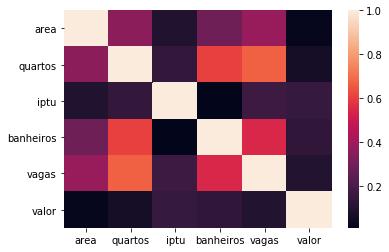

In [21]:
import seaborn as sns
sns.heatmap(dados.corr())

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [26]:
modelo = RandomForestRegressor()
x_treino, x_teste, y_treino, y_teste = train_test_split(
    dados.drop('valor', axis=1), dados['valor'], test_size=0.3
)

In [27]:
modelo.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
previsoes = modelo.predict(x_teste)
df = pd.DataFrame({'valor': y_teste, 'valor previsto': previsoes})
df.head()

,valor,valor previsto
578,0,390.050276
0,2100,44604.127778
529,5431,4719.500000
17,1700,1796.000000
357,0,7344.000000


In [33]:
dados = dados[dados['valor'] > 0]

In [34]:
len(dados)

539

In [35]:
from sklearn.neural_network import MLPRegressor

In [36]:
modelo = MLPRegressor()
x_treino, x_teste, y_treino, y_teste = train_test_split(
    dados.drop('valor', axis=1), dados['valor'], test_size=0.3
)
modelo.fit(x_treino, y_treino)

/home/gileno/workspace/cursos/curso-ensinar/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [37]:
previsoes = modelo.predict(x_teste)
df = pd.DataFrame({'valor': y_teste, 'valor previsto': previsoes})
df.head()

,valor,valor previsto
549,2500,1052.428368
415,2100,84.079076
570,1800,805.106864
335,2300,1793.787597
461,1600,599.277511


In [38]:
dados = pd.read_excel('../../dados/vivareal.xls')

In [39]:
dados.head()

,Unnamed: 0,link,latitude,longitude,valor,iptu,condominio,area,quartos,banheiros,suites,vagas
0,0,https://www.vivareal.com.br/imovel/apartamento...,-8.127518,-34.898142,680000,0,942,134,3,3.0,1,1.0
1,1,https://www.vivareal.com.br/imovel/apartamento...,-8.109744,-34.897566,775000,0,600,136,4,4.0,2,2.0
2,2,https://www.vivareal.com.br/imovel/apartamento...,-8.120500,-34.898148,1500000,6500,936,167,4,6.0,4,3.0
3,3,https://www.vivareal.com.br/imovel/apartamento...,-8.130808,-34.903129,415000,174,770,135,3,3.0,1,1.0
4,4,https://www.vivareal.com.br/imovel/apartamento...,-8.121509,-34.898536,615000,0,0,91,3,3.0,1,2.0


In [41]:
dados = dados.drop(['Unnamed: 0', 'link'], axis=1)

In [50]:
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate_init=0.02)

In [51]:
dados = dados.fillna(0)

In [52]:
modelo.fit(dados.drop('valor', axis=1), dados['valor'])

/home/gileno/workspace/cursos/curso-ensinar/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.02, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [53]:
import joblib

In [55]:
joblib.dump(modelo, 'mlp.joblib')

['mlp.joblib']